**Question 3**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

**Original plot**

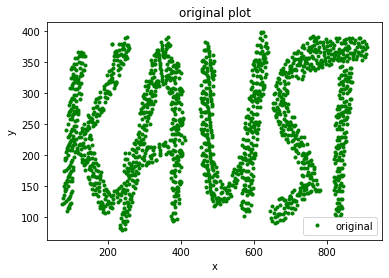

In [2]:
data = np.loadtxt("cluster.txt")
x1 = data[:,0]
x2 = data[:,1]
plt.plot(x1,x2,"g.", label="original")
plt.title("original plot")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

**Step 1: Form similarity graph**

Calculating the similarity with the adjacency matrix $K \in R^{n \times n}$ using $exp(-{(||xi-xj||)^2  \over{\sigma}^2})$

$L = I_n$ - $D^{-1 \over 2} K D^{-1 \over 2}$ = $I_n - M$

$M$ = $I_n - L$ 


In [3]:
from scipy.spatial import distance

sigma = 7.0
K = np.exp(-distance.cdist(data, data, metric = 'sqeuclidean')/np.square(sigma))
D = K.sum(axis=1)
D = np.sqrt(1/D)
M = np.multiply(D[np.newaxis, :], np.multiply(K, D[:, np.newaxis]))

**Step 2: Eigenvalue decpmposition**

In [ ]:
from scipy import linalg
from sklearn.preprocessing import normalize

U, Sigma, _ = linalg.svd(M, full_matrices = False, lapack_driver = 'gesvd')

**Step 3: K-mean clustering**

In [ ]:
Usubset_2 = U[:, 0:2] #2 clusters
y_predict_2 = KMeans(n_clusters = 2).fit_predict(normalize(Usubset_2))
plt.scatter(x1,x2,c=y_predict_2)
plt.title("2-cluster case")
plt.xlabel("x")
plt.ylabel("y")
plt.plot()

In [ ]:
Usubset_3 = U[:, 0:3] #3 clusters
y_predict_3 = KMeans(n_clusters = 3).fit_predict(normalize(Usubset_3))
plt.scatter(x1,x2,c=y_predict_3)
plt.title("3-cluster case")
plt.xlabel("x")
plt.ylabel("y")
plt.plot()

In [ ]:
Usubset_4 = U[:, 0:4] #3 clusters
y_predict_4 = KMeans(n_clusters = 4).fit_predict(normalize(Usubset_4))
plt.scatter(x1,x2,c=y_predict_4)
plt.title("4-cluster case")
plt.xlabel("x")
plt.ylabel("y")
plt.plot()

In [ ]:
Usubset_5 = U[:, 0:5] #5 clusters
y_predict_5 = KMeans(n_clusters = 5).fit_predict(normalize(Usubset_5))
plt.scatter(x1,x2,c=y_predict_5)
plt.title("5-cluster case")
plt.xlabel("x")
plt.ylabel("y")
plt.plot()